## Super Bowl Analytics!

## 1. Overview

The Super Bowl is an annual championship game between 2 teams in the National Football League. Millions of viewers in the U.S. and around the world watch the Super Bowl and advertisers can spend a sizable amount of money for a 30-second TV ad. Budweiser was the exclusive beer brand to advertise nationally during the Super Bowl but in 2023, its parent company Anheuser-Busch InBev ended its exclusivity, allowing other brands the opportunity to advertise for the first time in decades.

In this lab, we will examine the returns to advertising beer during the Super Bowl. We will use 2 data sources, including one scraped from Wikipedia.


## 2. Web Scraping

Let's first import some packages for web scraping and data processing.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

We then retrieve the content of the webpage and parse the data for further manipulation and data cleaning.

In [2]:
url = 'https://en.wikipedia.org/wiki/Super_Bowl_television_ratings'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

We find the table in the data - which is what we need for our analysis. We convert the html table into a dataframe, selecting only the first (and only) table.

In [3]:
table = soup.find('table')
df = pd.read_html(str(table))[0]
df.head()

SuperBowl              Date Network Avg. viewers(millions) Households  \
  SuperBowl              Date Network Avg. viewers(millions)     Rating   
0         I  January 15, 1967     CBS              26.75[13]   22.6[13]   
1         I  January 15, 1967     NBC              24.43[13]   18.5[13]   
2        II  January 14, 1968     CBS              39.12[13]   36.8[13]   
3       III  January 12, 1969     NBC              41.66[13]   36.0[13]   
4        IV  January 11, 1970     CBS              44.27[13]   39.4[13]   

          18–49 demographic           Avg. cost of 30-second ad  \
    Share            Rating     Share                  Original   
0  43[13]          Un­known  Un­known               $42,500[13]   
1  36[13]          Un­known  Un­known               $37,500[13]   
2  68[13]          Un­known  Un­known               $54,500[13]   
3  70[13]          Un­known  Un­known               $55,000[13]   
4  69[13]          Un­known  Un­known               $78,200[13]   

                           
  2023 inflation-adjusted  
0                $388,353  
1                $342,665  
2                $477,514  
3                $456,969  
4                $613,538

## 3. Data Cleaning

The imported dataframe needs to be cleaned up a bit. Let’s delete the first row, which repeats the text headings. We will also delete some columns that we will not use. Let’s relabel the column headings to be more concise.

In [4]:
df = df.iloc[:, [0, 1, 2, 3, 8]]
df.columns = ['Number', 'Date', 'Network', 'ViewersMillions', 'Ad30sec']
df.head()

,Number,Date,Network,ViewersMillions,Ad30sec
0,I,"January 15, 1967",CBS,26.75[13],"$42,500[13]"
1,I,"January 15, 1967",NBC,24.43[13],"$37,500[13]"
2,II,"January 14, 1968",CBS,39.12[13],"$54,500[13]"
3,III,"January 12, 1969",NBC,41.66[13],"$55,000[13]"
4,IV,"January 11, 1970",CBS,44.27[13],"$78,200[13]"


Notice that we need to remove the extra text “[13]” from a Wikipedia reference.   
We also reformat the variables from strings (characters) to the appropriate variable type.

In [5]:
df['ViewersMillions'] = df['ViewersMillions'].str.extract('(\d+[\.,\d+]*)')[0].str.replace(',', '').astype(float)
df['Ad30sec'] = df['Ad30sec'].str.extract('(\d+[\.,\d+]*)')[0].str.replace('[,$]', '').astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

/var/folders/k1/wt5v61sd6jd7_9m6k1cwqx8c0000gn/T/ipykernel_7460/2467403577.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Ad30sec'] = df['Ad30sec'].str.extract('(\d+[\.,\d+]*)')[0].str.replace('[,$]', '').astype(float)


,Number,Date,Network,ViewersMillions,Ad30sec
0,I,1967-01-15,CBS,26.75,42500.0
1,I,1967-01-15,NBC,24.43,37500.0
2,II,1968-01-14,CBS,39.12,54500.0
3,III,1969-01-12,NBC,41.66,55000.0
4,IV,1970-01-11,CBS,44.27,78200.0


### QUESTION 1: 
#### Super Bowl I was the only one to air on two networks (CBS and NBC). Calculate the total number of viewers for each Super Bowl. Create a line plot showing total Super Bowl viewership by year.

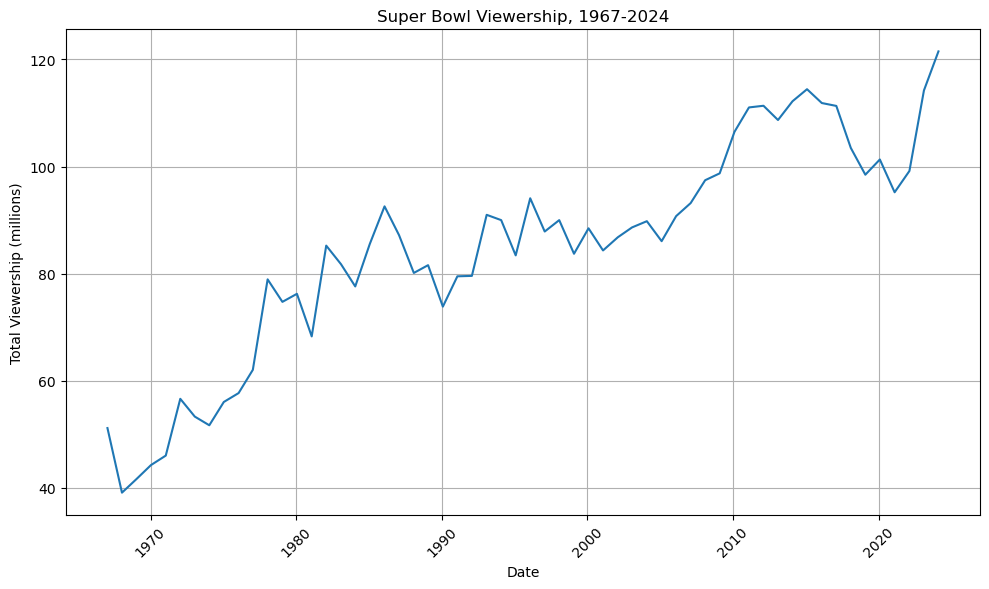

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data summarization by date
viewership = df.groupby('Date').agg(TotalViewers=pd.NamedAgg(column='ViewersMillions', aggfunc='sum')).reset_index()

# Plotting viewership over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=viewership, x='Date', y='TotalViewers')
plt.title('Super Bowl Viewership, 1967-2024')
plt.xlabel('Date')
plt.ylabel('Total Viewership (millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### QUESTION 2: 
#### Which year had the highest total TV viewership for the Super Bowl? What was the viewership?

In [7]:
# Finding the year with maximum viewership
max_viewership = viewership[viewership['TotalViewers'] == viewership['TotalViewers'].max()]

max_date = max_viewership['Date'].iloc[0]
max_total_viewers = max_viewership['TotalViewers'].iloc[0]

print(f"The year with the maximum Super Bowl viewership is {max_date.year} with {max_total_viewers} million viewers.")

The year with the maximum Super Bowl viewership is 2024 with 121.5 million viewers.


### QUESTION 3: 
#### Which of the 4 major networks has aired the most Super Bowls? Which network has the highest average TV viewership? Create a barplot of average TV viewership by network.

In [8]:
# Calculate mean viewership by network
networks = df.groupby('Network').agg(MeanViewers=pd.NamedAgg(column='ViewersMillions', aggfunc='mean'), Aired=pd.NamedAgg(column='Network', aggfunc='count')).reset_index()
networks['MeanViewers'] = round(networks['MeanViewers'],2)
networks

,Network,MeanViewers,Aired
0,ABC,85.21,7
1,CBS,79.23,22
2,Fox,99.20,10
3,NBC,78.74,20
4,Nickelodeon,1.25,1


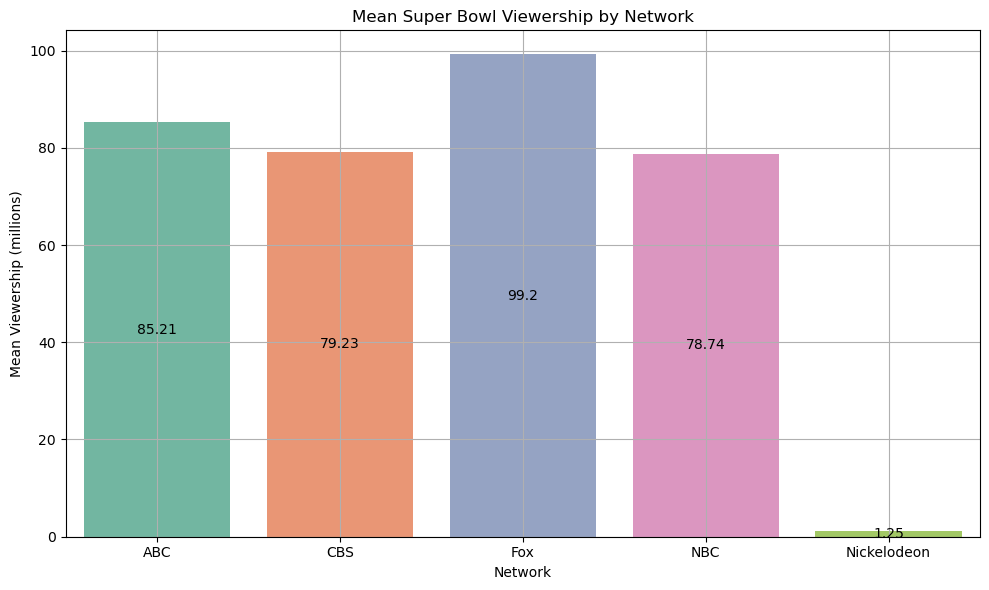

In [9]:
# Plotting mean viewership by network
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=networks, x='Network', y='MeanViewers', palette='Set2')
ax.bar_label(ax.containers[0], label_type='center')
plt.title('Mean Super Bowl Viewership by Network')
plt.xlabel('Network')
plt.ylabel('Mean Viewership (millions)')
plt.xticks()
plt.grid(True)
plt.tight_layout()
plt.show()

CBS has aired the most Super Bowls (22 since 1967). Fox has the highest average TV viewership.

### QUESTION 4: 
#### What is the average cost of a 30-second ad over the 6 Super Bowls from 2006 to 2011?

In [10]:
# Filter the DataFrame for Super Bowls between 2006 and 2011
sb_2006_2011 = df[(df['Date'] > '2006-01-01') & (df['Date'] < '2012-01-01')]

# Calculate the mean cost of a 30-second ad during this period
mean_cost = sb_2006_2011['Ad30sec'].mean()

print(f"The average cost of a 30-second ad during the Super Bowls from 2006 to 2011 was ${mean_cost:,.0f}.")

The average cost of a 30-second ad during the Super Bowls from 2006 to 2011 was $2,722,330.


## 4. Data Collection

Let's load the BEER dataset.

In [11]:
BEER = pd.read_csv('BEER.csv')
BEER.head()

,DMA,Brand,Year,NielsenRating,LocalTeamInSB,PostRevenuePerWeek
0,501,BUDWEISER,2006,0.371,0,0.098292
1,501,BUDWEISER,2007,0.351,0,0.107797
2,501,BUDWEISER,2008,0.449,1,0.110066
3,501,BUDWEISER,2009,0.379,0,0.122604
4,501,BUDWEISER,2010,0.411,0,0.142136


The BEER.csv file contains panel data on average household expenditures on beer after the Super Bowl. The dataset is based on the paper “Super Bowl Ads” by Hartmann and Klapper (Marketing Science, 2018). Special thanks to Professor Peter Rossi for proposing this analysis.

Each observation includes the following variables:

    DMA: Designated market area is a geographic area where TV ratings are measured by Nielsen
    Brand: Categorical variable for beer manufacturer
    Year: Year of Super Bowl (2006-2011)
    NielsenRating: Nielsen estimate of the proportion of households in DMA viewing Super Bowl that year
    LocalTeamInSB: Dummy variable that equals 1 if local team is playing in Super Bowl that year
    PostRevenuePerWeek: Average weekly beer expenditures per household in DMA in the 8-weeks post Super Bowl

Let’s first visualize a map of all DMAs in the US. For the analysis below, we only use the top 50 DMAs as reported by Nielsen. Be sure to first save the .png file in your working directory. 

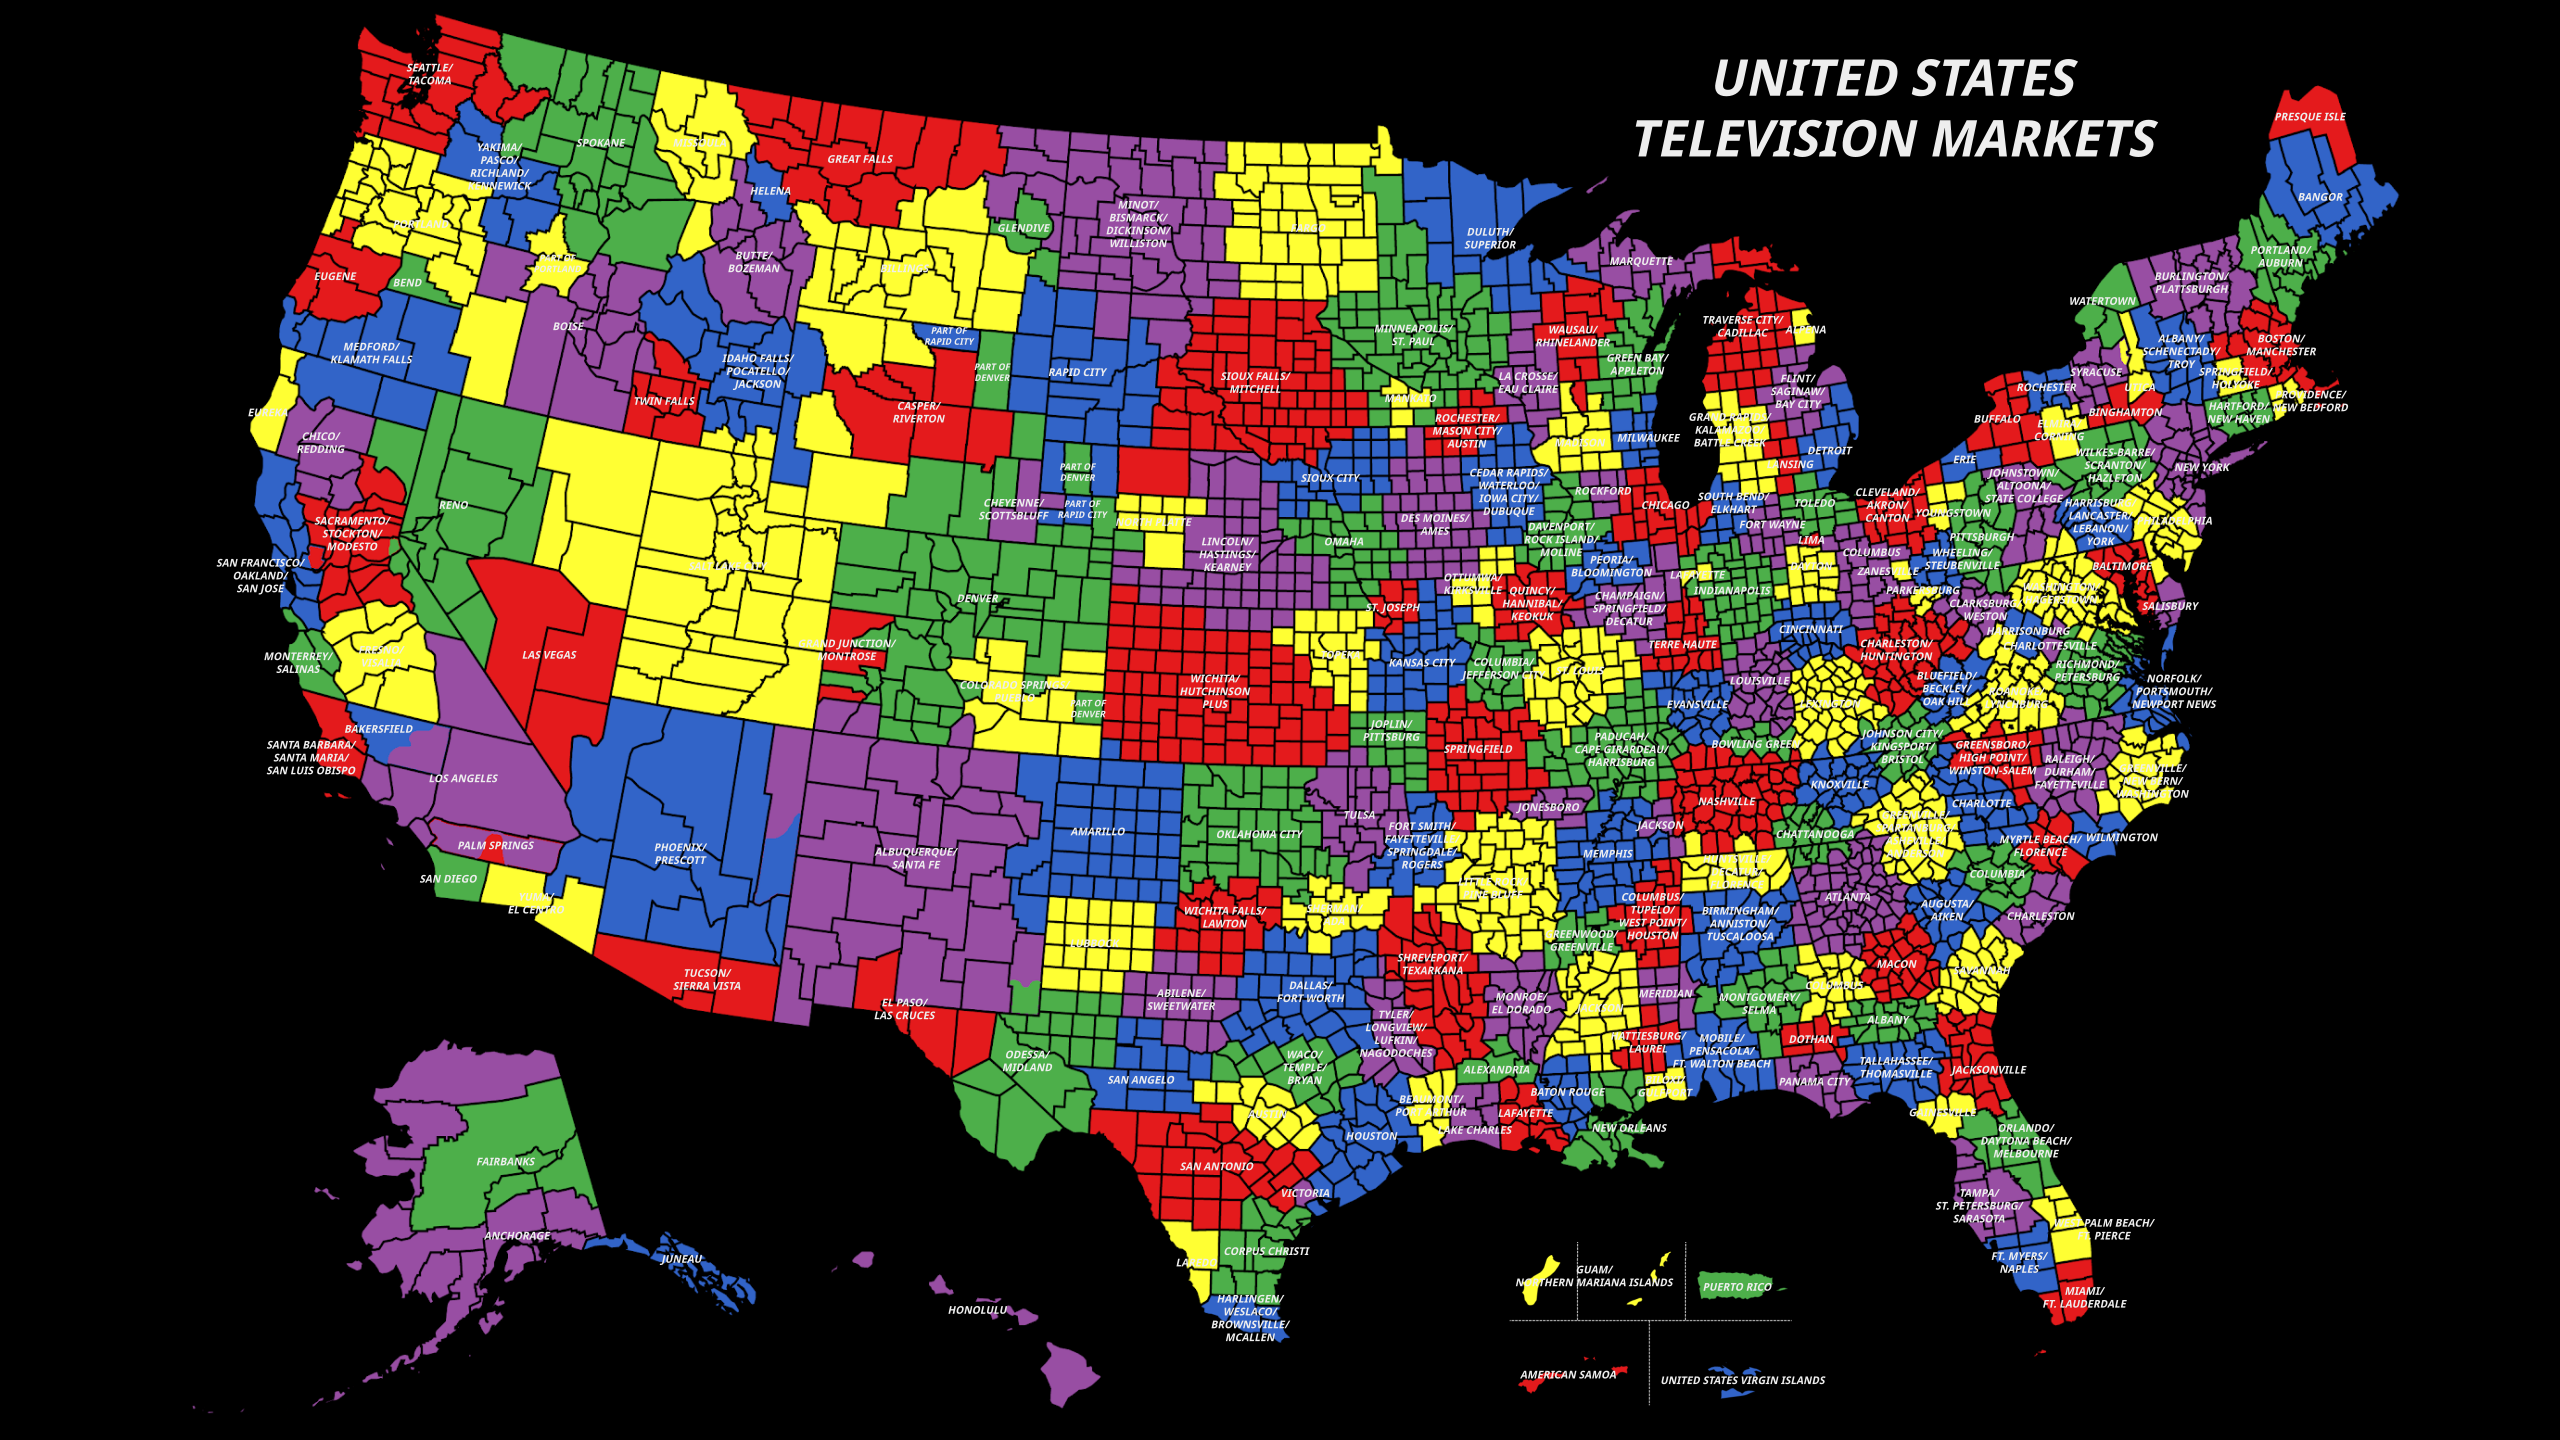

Figure 1: Designated Market Areas (DMA)


In [12]:
from IPython.display import Image, display

# Displaying the image with a caption and ensuring it is centered
display(Image(filename='US_TV_Market_Map.png', width=800))
print("Figure 1: Designated Market Areas (DMA)")  # Caption for the image

Next, let’s see where fans of each NFL team tend to live, based on Facebook data. 

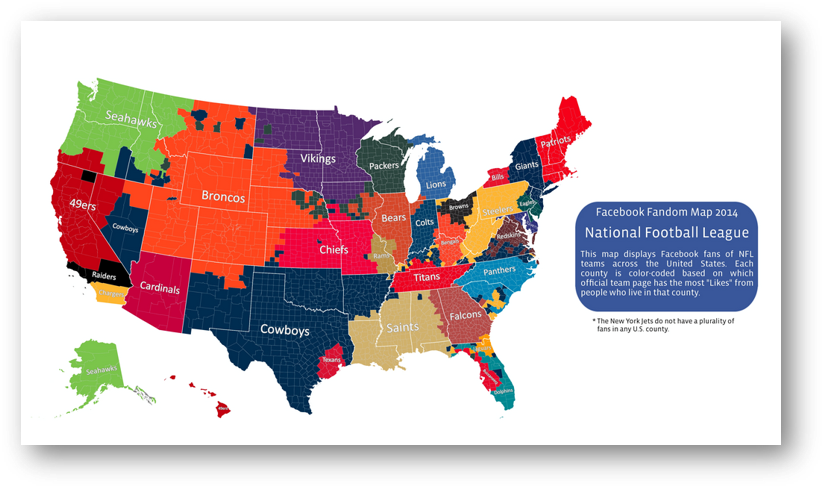

Figure 2: National Football League (NFL) Team Popularity


In [13]:
display(Image(filename='Fandom.png', width=800))
print("Figure 2: National Football League (NFL) Team Popularity")  # Caption for the image

## 5. Panel Data

Let’s create a dummy variable to indicate if a beer manufacturer has a Super Bowl ad. Note, in the time period analyzed, only Budweiser could advertise.

In [14]:
BEER['Ad'] = (BEER['Brand'] == 'BUDWEISER').astype(int)

Create an interaction between the the ad dummy variable and Nielsen ratings. This new variable will capture our treatment effect: the proportion of households in a DMA who are exposed to a beer ad during the Super Bowl that year.

In [15]:
BEER['AdXRating'] = BEER['Ad'] * BEER['NielsenRating']

Create a variable for Brand-DMA fixed effect.

In [16]:
BEER['BrandDMA'] = BEER['Brand'] + '_' + BEER['DMA'].astype(str)

Create a variable for Brand-Year fixed effect.

In [17]:
BEER['BrandYear'] = BEER['Brand'] + '_' + BEER['Year'].astype(str)

In [18]:
BEER.head()

,DMA,Brand,Year,NielsenRating,LocalTeamInSB,PostRevenuePerWeek,Ad,AdXRating,BrandDMA,BrandYear
0,501,BUDWEISER,2006,0.371,0,0.098292,1,0.371,BUDWEISER_501,BUDWEISER_2006
1,501,BUDWEISER,2007,0.351,0,0.107797,1,0.351,BUDWEISER_501,BUDWEISER_2007
2,501,BUDWEISER,2008,0.449,1,0.110066,1,0.449,BUDWEISER_501,BUDWEISER_2008
3,501,BUDWEISER,2009,0.379,0,0.122604,1,0.379,BUDWEISER_501,BUDWEISER_2009
4,501,BUDWEISER,2010,0.411,0,0.142136,1,0.411,BUDWEISER_501,BUDWEISER_2010


### QUESTION 5: 
#### How many BrandDMA categories (fixed effects) are there? How many BrandYear categories (fixed effects) are there?

In [19]:
# Count the number of unique BrandDMA categories
unique_brand_dma = BEER['BrandDMA'].nunique()

# Count the number of unique BrandYear categories
unique_brand_year = BEER['BrandYear'].nunique()

print(f"There are {unique_brand_dma} unique Brand-DMA categories.")
print(f"There are {unique_brand_year} unique Brand-Year categories.")

There are 250 unique Brand-DMA categories.
There are 30 unique Brand-Year categories.


We have 5 brands, 50 DMAs, and 6 years of data. So we have 5x50 = 250 BrandDMA categories and 5x6 = 30 BrandYear categories.

### QUESTION 6: 
#### Let’s examine the variation in Nielsen ratings based on whether the local team is playing in the Super Bowl. We will overlay 2 density plots (continuous versions of histograms). What might explain the different shapes of the 2 curves?

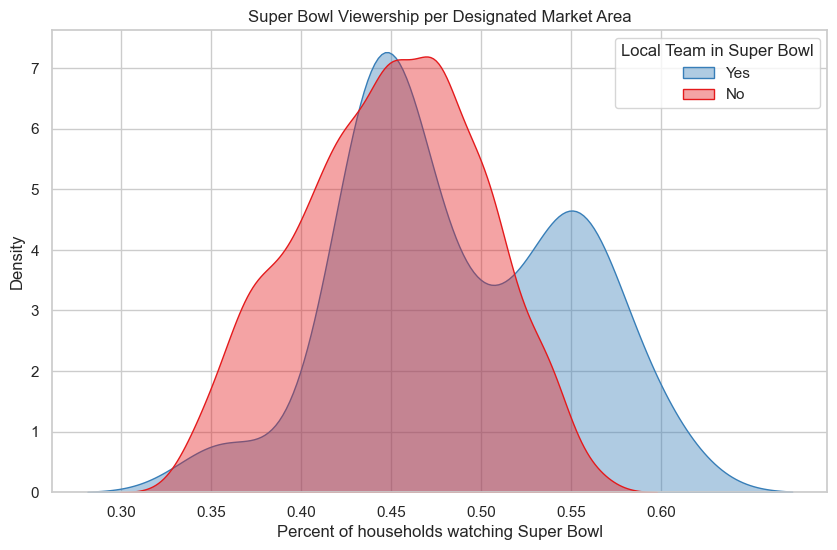

In [20]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting density plots for Nielsen ratings based on local team participation
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=BEER, x='NielsenRating', hue='LocalTeamInSB', fill=True, common_norm=False, palette='Set1', alpha=0.4)
ax.set_title('Super Bowl Viewership per Designated Market Area')
ax.set_xlabel('Percent of households watching Super Bowl')
ax.set_ylabel('Density')
plt.xticks(ticks=[i/100 for i in range(30, 61, 5)])  # Setting x-ticks as percentages

# Customizing the legend
# handles, labels = ax.get_legend_handles_labels()
ax.legend(labels=["Yes", "No"], title="Local Team in Super Bowl")

plt.show()

### Solution:
Among DMAs with a local team NOT in the Super Bowl (blue plot), we see a single peak that looks close to Normally distributed, which is expected due to the Central Limit Theorem. Among DMAs with a local team in the Super Bowl (red plot), we see 2 peaks, which could correspond to the home areas of the 2 teams playing.

### QUESTION 7: 
#### Calculate average Nielsen ratings per year. Are these constant or changing over time?

In [21]:
# Group by 'Year' and calculate the average Nielsen ratings, rounding to three decimal places
nielsen = BEER.groupby('Year').agg(MeanRating=('NielsenRating', lambda x: round(x.mean(), 3))).reset_index()

# Display the DataFrame in a clean table format using pandas directly
print(nielsen)

   Year  MeanRating
0  2006       0.429
1  2007       0.430
2  2008       0.451
3  2009       0.430
4  2010       0.477
5  2011       0.489


#### SOLUTION: 
The average ratings are generally increasing from about 0.43 in 2006 to 0.49 in 2011.

### QUESTION 8: 
#### Calculate average weekly household beer expenditures per year, by beer brand. Let’s plot this as a line plot and include the Nielsen trends. Are Budweiser’s average expenditures per household constant or changing over time?

In [22]:
BEER['Brand'] = BEER['Brand'].astype('category')

# Group by Year and Brand and calculate the mean revenue
revenue = BEER.groupby(['Year', 'Brand']).agg(MeanRevenue=('PostRevenuePerWeek', 'mean')).reset_index()

# Filter for Budweiser and calculate the mean revenue by year
BUD = BEER[BEER['Brand'] == 'BUDWEISER'].groupby('Year').agg(MeanRevenue=('PostRevenuePerWeek', 'mean')).reset_index()

In [23]:
BUD

,Year,MeanRevenue
0,2006,0.363347
1,2007,0.392444
2,2008,0.399978
3,2009,0.446944
4,2010,0.451838
5,2011,0.440397


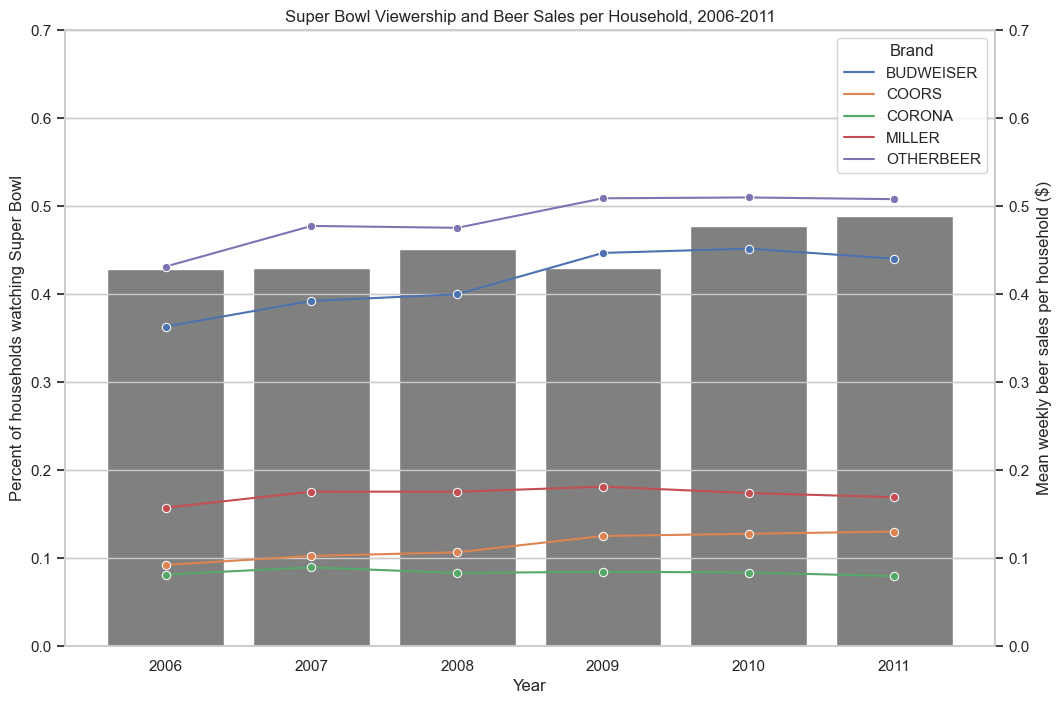

In [24]:
# Ensure 'Year' is in the correct format for plotting
revenue['Year'] = revenue['Year'].astype(str)
nielsen['Year'] = nielsen['Year'].astype(str)

# Creating the figure and primary axis
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=nielsen, x='Year', y='MeanRating', color='grey')

# Secondary axis for plotting the line plots of mean revenue
ax2 = ax.twinx()

# Plotting mean revenue by year and brand on the secondary axis
sns.lineplot(data=revenue, x='Year', y='MeanRevenue', hue='Brand', marker='o', ax=ax2)
ax2.set_ylabel('Mean weekly beer sales per household ($)')


# Setting labels and titles
ax.set_xlabel('Year')
ax.set_ylabel('Percent of households watching Super Bowl')
plt.title('Super Bowl Viewership and Beer Sales per Household, 2006-2011')

ax.set_ylim(0.0, 0.7)
ax.set_yticks(np.linspace(0.0, 0.7, 8))

ax2.set_ylim(0.0, 0.7)
ax2.set_yticks(np.linspace(0.0, 0.7, 8))

# Grid and legend configuration
ax2.legend(loc='upper right', title='Brand')

plt.show()

# 6. Regression with Fixed Effects

Notice that since Super Bowl ratings AND Budweiser revenues are both increasing over this time period, this might lead to a spurious correlation between the two variables. But this could be just due to increasing trends overall: more people watch football and more people drink beer.

Instead, we will take advantage of the fact that different regions (DMAs) of the country are exposed to beer ads differentially over time, based on whether their local team is playing in the Super Bowl.

Run a regression of post-Super Bowl revenue on our main treatment variable (AdXRating) and Nielsen ratings. Include year fixed effects.

In [25]:
import statsmodels.formula.api as smf

# Convert 'Year' to a categorical variable for the regression model
BEER['Year'] = BEER['Year'].astype('category')

# Running the regression with fixed effects for Year
# AdXRating and NielsenRating are treated as continuous variables
formula1 = 'PostRevenuePerWeek ~ AdXRating + NielsenRating + C(Year)'
model1 = smf.ols(formula1, data=BEER).fit()

# Print the summary of the regression model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:     PostRevenuePerWeek   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     29.23
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           6.74e-38
Time:                        12:23:07   Log-Likelihood:                 116.27
No. Observations:                1450   AIC:                            -216.5
Df Residuals:                    1442   BIC:                            -174.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3983      0.057     

Notice that all the coefficients for Year are reported. We don’t need to explicitly show these; we just want to include them in the regression to control for beer trends over time.

### QUESTION 9: 
#### Repeat the last regression, replacing Year fixed effects with BrandYear fixed effects.

In [26]:
# Ensure 'BrandYear' is treated as a categorical variable for the regression model
BEER['BrandYear'] = BEER['BrandYear'].astype('category')

# Running the regression with fixed effects for BrandYear
formula2 = 'PostRevenuePerWeek ~ AdXRating + NielsenRating + C(BrandYear)'
model2 = smf.ols(formula2, data=BEER).fit()

# Print the summary of the regression model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:     PostRevenuePerWeek   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     43.75
Date:                Thu, 20 Jun 2024   Prob (F-statistic):          5.41e-182
Time:                        12:23:07   Log-Likelihood:                 506.64
No. Observations:                1450   AIC:                            -949.3
Df Residuals:                    1418   BIC:                            -780.3
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### QUESTION 10: 
#### Repeat the last regression but include both BrandYear and BrandDMA fixed effects. This implicitly compares beer revenue within the same DMA, but only the Super Bowl ratings (and thus exposure to a Budweiser ad) are changing over time. We can suppress reporting these coefficients and instead include a line for Fixed Effects in the summary table.

In [27]:
# Ensure that BrandYear and BrandDMA are treated as categorical variables
BEER['BrandYear'] = BEER['BrandYear'].astype('category')
BEER['BrandDMA'] = BEER['BrandDMA'].astype('category')

# Define the model with both BrandYear and BrandDMA fixed effects
formula3 = 'PostRevenuePerWeek ~ AdXRating + NielsenRating + C(BrandYear) + C(BrandDMA)'
model3 = smf.ols(formula3, data=BEER).fit()

> In order to get the Python implementation of the R reporting library 'Stargazer', make sure you pip install stargazer in Terminal.

In [31]:
from stargazer.stargazer import Stargazer

# Create the Stargazer object
stargazer = Stargazer([model1, model2, model3])

# Omit the coefficients for 'Year', 'BrandYear', and 'BrandDMA'
stargazer.covariate_order(['AdXRating', 'NielsenRating', 'Intercept'])
stargazer.add_line("Fixed Effects", ["Year", "Brand x Year", "Brand x Year, Brand x DMA"])

# Display the summary table
stargazer

### QUESTION 11: 
#### What is your interpretation of the coefficient on AdXRating in Regression 3? Is this statistically significant at the 5% level? How does this compare to Budweiser’s baseline revenue per week?

In [35]:
# Calculate the treatment effect from Regression3
treatment = model3.params['AdXRating']

# Calculate the mean weekly revenue for BUD
weekly_revenue = BUD['MeanRevenue'].mean()

# Calculate the revenue boost
revenue_boost = treatment / weekly_revenue

# Print the revenue boost
print(revenue_boost)

0.3566265376324271


#### SOLUTION: 
Our main treatment variable AdXRating has a coefficient of 0.148 (p<0.05). This implies that exposure to a beer ad during the Super Bowl is associated with a `$0.15` increase in weekly beer revenue. 
Recall that mean revenue for Budweiser over this period is about `$0.42` so this represents a `36%` increase.

### QUESTION 12: 
#### Assume there are about 100 million households in the US, but not everyone watches the Super Bowl. Given the average viewership for the Super Bowl (based on Nielsen ratings), what is Budweiser’s extra revenue from the Super Bowl ads, assuming the boost lasts a full 8 weeks.

In [36]:
# Calculate the mean Nielsen rating from the BEER data
viewership = BEER['NielsenRating'].mean()

# Calculate the extra revenue
extra_revenue = 100000000 * viewership * 8 * revenue_boost

# Print the extra revenue
print(extra_revenue)

128794813.24327368


#### SOLUTION: 
Back of the envelope, this represents an additional $128 million in revenue.

### QUESTION 13: 
#### Let’s conservatively assume each Budweiser ad costs $1 million to create. Using the average cost of a 30-second ad calculated above (from Wikipedia), what is Budweiser’s annual advertising costs assuming they air 9 Super Bowl ads each year?

In [38]:
advertising = 9*(mean_cost + 1000000)
print(advertising)

33500965.5


#### SOLUTION: 
Total advertising costs are about $33.5 million.

### QUESTION 14: 
#### Based on this analysis, do Super Bowl beer commercials have a positive return on investment?

#### SOLUTION: 
Yes! Even if Budweiser captures only part of the additional post-Super Bowl revenues, it has a positive ROI.